# PFAS 2013-2016

In this notebook, I run some tests with areas that contain each pfas chemical and their correlation to other chemicals. I also test to see if the pfas in peoples blood has been reaching to the minimum needed to report and checking if those cases have rised over 3 years. All of the data is over 2013-2016 and the reported levels for the chemicals are very outdated compared to the current standard.

In [62]:
import sys
import numpy as np
import pandas as pd
import plotly as py
import seaborn as sns
import geopandas as gpd
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import linear_model
from IPython.display import HTML
import plotly.tools as plotly_tools
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')
ucmr3_df = pd.read_csv("C:\\Users\\cabon\\OneDrive\\Documents\\Capstone\\Downloads\\UCMR3_All.csv")
ucmr3_df

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,SampleID,Contaminant,MRL,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State
0,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,strontium,0.30,EPA 200.8,=,98.0,SE3,AM,5,MI
1,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,PFOS,0.04,EPA 537,<,NaN,SE3,AM,5,MI
2,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,bromomethane,0.20,EPA 524.3,<,NaN,SE3,AM,5,MI
3,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,chloromethane,0.20,EPA 524.3,<,NaN,SE3,AM,5,MI
4,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,vanadium,0.20,EPA 200.8,<,NaN,SE3,AM,5,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,IL1790550,North Pekin,S,90001,Well #2,GW,EP001,Finished Water Tap,EP,99001.0,...,116266P,"1,1-dichloroethane",0.03,EPA 524.3,<,NaN,SE2,AM,5,IL
1048571,IL1790550,North Pekin,S,90002,Well #3,GW,EP002,Finished Water Tap,EP,99001.0,...,116267P,"1,1-dichloroethane",0.03,EPA 524.3,<,NaN,SE2,AM,5,IL
1048572,IN5219007,Huntingburg Municipal Water,S,90001,Huntingburg WTP,SW,EP001,EP from Huntingburg WTP,EP,99001.0,...,116268P,"1,1-dichloroethane",0.03,EPA 524.3,<,NaN,SE4,AM,5,IN
1048573,IN5219007,Huntingburg Municipal Water,S,90002,Patoka Phase I,SW,EP002,Phase 1 Pit,EP,99001.0,...,116269P,"1,1-dichloroethane",0.03,EPA 524.3,<,NaN,SE4,AM,5,IN


In [63]:
#!pip install chart-studio

The UCMR3 data was handed by the client and a list of tested locations across the us through 2013 to 2016. It gives different information such as the location it was taken, region, state, the type of chemical, and the recorded variable if there is one.

## UCMR3 Dataset

In [64]:
ucmr3_df_confirmed = ucmr3_df.dropna(axis=0)
ucmr3_df_confirmed

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,SampleID,Contaminant,MRL,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State
0,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,strontium,0.30,EPA 200.8,=,98.00000,SE3,AM,5,MI
6,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,chromium,0.20,EPA 200.8,=,0.23000,SE3,AM,5,MI
23,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201312120825AM,chromium-6,0.03,EPA 218.7,=,0.29000,SE2,AM,5,MI
24,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,chromium-6,0.03,EPA 218.7,=,0.23000,SE3,AM,5,MI
25,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201312120825AM,chromium,0.20,EPA 200.8,=,0.30000,SE2,AM,5,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042156,AZ0408001,Oatman Water Company,S,90001,Well #1,GW,EPDS001,Finished Tap Water,EP,99001.0,...,106540Q,PFOS,0.04,EPA 537,=,0.30000,SE1,AM,9,AZ
1045418,AZ0408001,Oatman Water Company,S,90001,Well #1,GW,EPDS001,Finished Tap Water,EP,99001.0,...,106540Q,PFOA,0.02,EPA 537,=,0.03000,SE1,AM,9,AZ
1045419,AZ0408001,Oatman Water Company,S,90001,Well #1,GW,EPDS001,Finished Tap Water,EP,99001.0,...,109398P,PFOA,0.02,EPA 537,=,0.03200,SE2,AM,9,AZ
1045420,PA1090128,Doylestown Twp. Muni. Authority,S,90007,Cross Keys Well,GW,EP007,CKeys EP #113,EP,99002.0,...,109567R,PFOA,0.02,EPA 537,=,0.13000,SE3,AM,3,PA


### Breaking Down to only PFAS chemicals

In [65]:
#ucmr3_df_regions = ucmr3_df[ucmr3_df['Region'] == 4]
#pfas_ucmr = ucmr3_df_regions[ucmr3_df_regions['Contaminant'].str.startswith('PF')]
#pfas_ucmr

In [66]:
pfas_ucmr = ucmr3_df[ucmr3_df['Contaminant'].str.startswith('PF')]
pfas_ucmr

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,SampleID,Contaminant,MRL,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State
1,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,PFOS,0.04,EPA 537,<,NaN,SE3,AM,5,MI
8,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,PFOA,0.02,EPA 537,<,NaN,SE3,AM,5,MI
10,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,PFNA,0.02,EPA 537,<,NaN,SE3,AM,5,MI
11,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,PFHpA,0.01,EPA 537,<,NaN,SE3,AM,5,MI
12,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,PFHxS,0.03,EPA 537,<,NaN,SE3,AM,5,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045417,UTAH03001,Nibley City Water,S,90006,Nelson Well,GW,WS006,Sample Tap,EP,99001.0,...,117031R,PFOA,0.02,EPA 537,<,NaN,SE2,AM,8,UT
1045418,AZ0408001,Oatman Water Company,S,90001,Well #1,GW,EPDS001,Finished Tap Water,EP,99001.0,...,106540Q,PFOA,0.02,EPA 537,=,0.03000,SE1,AM,9,AZ
1045419,AZ0408001,Oatman Water Company,S,90001,Well #1,GW,EPDS001,Finished Tap Water,EP,99001.0,...,109398P,PFOA,0.02,EPA 537,=,0.03200,SE2,AM,9,AZ
1045420,PA1090128,Doylestown Twp. Muni. Authority,S,90007,Cross Keys Well,GW,EP007,CKeys EP #113,EP,99002.0,...,109567R,PFOA,0.02,EPA 537,=,0.13000,SE3,AM,3,PA


In [67]:
pfas_confirmed = pfas_ucmr.dropna(axis=0)
pfas_confirmed

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,SampleID,Contaminant,MRL,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State
3310,MI0005370,Plainfield Township,L,5448,Treatment Plant,GU,TP100,Treatment Plant Tap,EP,5004.0,...,2897547,PFOS,0.04,EPA 537,=,0.06000,SE2,AM,5,MI
3391,MI0005370,Plainfield Township,L,5448,Treatment Plant,GU,TP100,Treatment Plant Tap,EP,5004.0,...,2850296,PFOS,0.04,EPA 537,=,0.05000,SE1,AM,5,MI
5025,MN1020001,Anoka,L,13,Treatment Plant #7,GW,E06,Treatment Plant #7 EPTDS,EP,21.0,...,K1410103-001,PFHpA,0.01,EPA 537,=,0.01550,SE2,AM,5,MN
11052,ME0091410,Sanford Water District,L,1799,Treatment Plant 5,GW,TP5,EPTDS Eagle Drive #1,EP,8541.0,...,2806665,PFHxS,0.03,EPA 537,=,0.11000,SE1,AM,1,ME
11067,ME0091410,Sanford Water District,L,1799,Treatment Plant 5,GW,TP5,EPTDS Eagle Drive #1,EP,8541.0,...,2806665,PFOS,0.04,EPA 537,=,0.29000,SE1,AM,1,ME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042156,AZ0408001,Oatman Water Company,S,90001,Well #1,GW,EPDS001,Finished Tap Water,EP,99001.0,...,106540Q,PFOS,0.04,EPA 537,=,0.30000,SE1,AM,9,AZ
1045418,AZ0408001,Oatman Water Company,S,90001,Well #1,GW,EPDS001,Finished Tap Water,EP,99001.0,...,106540Q,PFOA,0.02,EPA 537,=,0.03000,SE1,AM,9,AZ
1045419,AZ0408001,Oatman Water Company,S,90001,Well #1,GW,EPDS001,Finished Tap Water,EP,99001.0,...,109398P,PFOA,0.02,EPA 537,=,0.03200,SE2,AM,9,AZ
1045420,PA1090128,Doylestown Twp. Muni. Authority,S,90007,Cross Keys Well,GW,EP007,CKeys EP #113,EP,99002.0,...,109567R,PFOA,0.02,EPA 537,=,0.13000,SE3,AM,3,PA


### Non PFAS

In [68]:
non_pfas = ucmr3_df[ucmr3_df['Contaminant'].str.startswith('PF') != True]
non_pfas

,PWSID,PWSName,Size,FacilityID,FacilityName,FacilityWaterType,SamplePointID,SamplePointName,SamplePointType,AssociatedFacilityID,...,SampleID,Contaminant,MRL,MethodID,AnalyticalResultsSign,AnalyticalResultValue,SampleEventCode,MonitoringRequirement,Region,State
0,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,strontium,0.30,EPA 200.8,=,98.0,SE3,AM,5,MI
2,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,bromomethane,0.20,EPA 524.3,<,NaN,SE3,AM,5,MI
3,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,chloromethane,0.20,EPA 524.3,<,NaN,SE3,AM,5,MI
4,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,vanadium,0.20,EPA 200.8,<,NaN,SE3,AM,5,MI
5,MI0004370,City of Midland,L,6197,Water Treatment Plant,SW,TP001,Water Treatment Plant Tap,EP,4674.0,...,201403130319AM,"1,2,3-trichloropropane",0.03,EPA 524.3,<,NaN,SE3,AM,5,MI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,IL1790550,North Pekin,S,90001,Well #2,GW,EP001,Finished Water Tap,EP,99001.0,...,116266P,"1,1-dichloroethane",0.03,EPA 524.3,<,NaN,SE2,AM,5,IL
1048571,IL1790550,North Pekin,S,90002,Well #3,GW,EP002,Finished Water Tap,EP,99001.0,...,116267P,"1,1-dichloroethane",0.03,EPA 524.3,<,NaN,SE2,AM,5,IL
1048572,IN5219007,Huntingburg Municipal Water,S,90001,Huntingburg WTP,SW,EP001,EP from Huntingburg WTP,EP,99001.0,...,116268P,"1,1-dichloroethane",0.03,EPA 524.3,<,NaN,SE4,AM,5,IN
1048573,IN5219007,Huntingburg Municipal Water,S,90002,Patoka Phase I,SW,EP002,Phase 1 Pit,EP,99001.0,...,116269P,"1,1-dichloroethane",0.03,EPA 524.3,<,NaN,SE4,AM,5,IN


## Is there an indicator in finding PFAS in the water

In [69]:
pfas_us = ucmr3_df.dropna(axis=0)
pfas_us = pfas_us[pfas_us['Contaminant'].str.startswith('PF')]
pfas_us = pfas_us.drop(['FacilityID', 'Region', 'State', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)

pfas_us

,PWSID,PWSName,FacilityName,AssociatedFacilityID,CollectionDate,Contaminant,MRL,AnalyticalResultsSign,AnalyticalResultValue
3310,MI0005370,Plainfield Township,Treatment Plant,5004.0,9/16/2013,PFOS,0.04,=,0.06000
3391,MI0005370,Plainfield Township,Treatment Plant,5004.0,6/28/2013,PFOS,0.04,=,0.05000
5025,MN1020001,Anoka,Treatment Plant #7,21.0,9/15/2014,PFHpA,0.01,=,0.01550
11052,ME0091410,Sanford Water District,Treatment Plant 5,8541.0,4/9/2013,PFHxS,0.03,=,0.11000
11067,ME0091410,Sanford Water District,Treatment Plant 5,8541.0,4/9/2013,PFOS,0.04,=,0.29000
...,...,...,...,...,...,...,...,...,...
1042156,AZ0408001,Oatman Water Company,Well #1,99001.0,4/22/2014,PFOS,0.04,=,0.30000
1045418,AZ0408001,Oatman Water Company,Well #1,99001.0,4/22/2014,PFOA,0.02,=,0.03000
1045419,AZ0408001,Oatman Water Company,Well #1,99001.0,10/29/2014,PFOA,0.02,=,0.03200
1045420,PA1090128,Doylestown Twp. Muni. Authority,Cross Keys Well,99002.0,10/14/2014,PFOA,0.02,=,0.13000


In [70]:
test_year = pfas_us.copy()
test_year['CollectionDate'] = pd.to_datetime(test_year['CollectionDate'])
test_year

,PWSID,PWSName,FacilityName,AssociatedFacilityID,CollectionDate,Contaminant,MRL,AnalyticalResultsSign,AnalyticalResultValue
3310,MI0005370,Plainfield Township,Treatment Plant,5004.0,2013-09-16,PFOS,0.04,=,0.06000
3391,MI0005370,Plainfield Township,Treatment Plant,5004.0,2013-06-28,PFOS,0.04,=,0.05000
5025,MN1020001,Anoka,Treatment Plant #7,21.0,2014-09-15,PFHpA,0.01,=,0.01550
11052,ME0091410,Sanford Water District,Treatment Plant 5,8541.0,2013-04-09,PFHxS,0.03,=,0.11000
11067,ME0091410,Sanford Water District,Treatment Plant 5,8541.0,2013-04-09,PFOS,0.04,=,0.29000
...,...,...,...,...,...,...,...,...,...
1042156,AZ0408001,Oatman Water Company,Well #1,99001.0,2014-04-22,PFOS,0.04,=,0.30000
1045418,AZ0408001,Oatman Water Company,Well #1,99001.0,2014-04-22,PFOA,0.02,=,0.03000
1045419,AZ0408001,Oatman Water Company,Well #1,99001.0,2014-10-29,PFOA,0.02,=,0.03200
1045420,PA1090128,Doylestown Twp. Muni. Authority,Cross Keys Well,99002.0,2014-10-14,PFOA,0.02,=,0.13000


<AxesSubplot:>

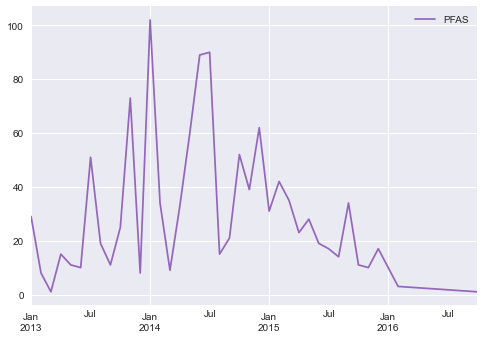

In [71]:
test_year_pf = pfas_us.copy()
test_year_pf['CollectionDate'] = pd.to_datetime(test_year_pf['CollectionDate'])
b_p = test_year_pf.groupby(test_year_pf.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()
d_p.plot(legend = True, label = 'PFAS', color = 'tab:purple')

In [72]:
d_p.name = "PFAS"
names = np.array(["PFAS"])
count_test = pd.concat([d_p], axis = 1)

,PFAS
2013-01,29
2013-02,8
2013-03,1
2013-04,15
2013-05,11
2013-06,10
2013-07,51
2013-08,19
2013-09,11
2013-10,25


In [73]:
test_year_pf = pfas_us.copy()
test_year_pf['CollectionDate'] = pd.to_datetime(test_year_pf['CollectionDate'])
for x in test_year_pf['Contaminant'].unique():
    a_p = test_year_pf[test_year['Contaminant'] == x].copy()
    b_p = a_p.groupby(a_p.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c_p = b_p.apply(pd.DataFrame)
    d_p = c_p.notnull().sum()
    d_p.name = x
    names = np.append(names, x)
    count_test = count_test.join(d_p)
count_test = count_test.fillna(0)
count_test

,PFAS,PFOS,PFHpA,PFHxS,PFOA,PFNA,PFBS
2013-01,29,8.0,6.0,5.0,10.0,NaN,NaN
2013-02,8,2.0,2.0,2.0,2.0,NaN,NaN
2013-03,1,NaN,NaN,NaN,1.0,NaN,NaN
2013-04,15,5.0,3.0,3.0,4.0,NaN,NaN
2013-05,11,3.0,1.0,1.0,5.0,1.0,NaN
2013-06,10,6.0,1.0,1.0,1.0,1.0,NaN
2013-07,51,12.0,8.0,12.0,17.0,1.0,1.0
2013-08,19,5.0,4.0,5.0,4.0,1.0,NaN
2013-09,11,4.0,3.0,1.0,3.0,NaN,NaN
2013-10,25,4.0,8.0,1.0,12.0,NaN,NaN


In [75]:
non_pfas_us = ucmr3_df.dropna(axis=0)
non_pfas_us = non_pfas_us[non_pfas_us['Contaminant'].str.startswith('PF') != True]
non_pfas_us = non_pfas_us.drop(['FacilityID', 'Region', 'State', 'SamplePointID', 'SamplePointType', 'Size', 'AssociatedSamplePointID', 'SampleID', 'MethodID', 'SampleEventCode', 'MonitoringRequirement', 'SamplePointName', 'FacilityWaterType'], axis = 1)
non_pfas_us

,PWSID,PWSName,FacilityName,AssociatedFacilityID,CollectionDate,Contaminant,MRL,AnalyticalResultsSign,AnalyticalResultValue
0,MI0004370,City of Midland,Water Treatment Plant,4674.0,3/11/2014,strontium,0.30,=,98.000
6,MI0004370,City of Midland,Water Treatment Plant,4674.0,3/11/2014,chromium,0.20,=,0.230
23,MI0004370,City of Midland,Water Treatment Plant,4674.0,12/11/2013,chromium-6,0.03,=,0.290
24,MI0004370,City of Midland,Water Treatment Plant,4674.0,3/11/2014,chromium-6,0.03,=,0.230
25,MI0004370,City of Midland,Water Treatment Plant,4674.0,12/11/2013,chromium,0.20,=,0.300
...,...,...,...,...,...,...,...,...,...
1012611,PA1460059,SCI Graterford,Well #5,99001.0,7/22/2013,HCFC-22,0.08,=,0.970
1012612,MA3254000,Rowley Water Department,Well #2,99001.0,8/5/2013,HCFC-22,0.08,=,1.200
1012613,MA3254000,Rowley Water Department,Well #2,99001.0,2/4/2013,HCFC-22,0.08,=,2.495
1012614,PA1460059,SCI Graterford,Well #7,99002.0,1/23/2013,HCFC-22,0.08,=,5.825


In [76]:
non_pfas_us = non_pfas_us[non_pfas_us['PWSName'].isin(pfas_us['PWSName'])]
non_pfas_us

,PWSID,PWSName,FacilityName,AssociatedFacilityID,CollectionDate,Contaminant,MRL,AnalyticalResultsSign,AnalyticalResultValue
3288,MI0005370,Plainfield Township,Treatment Plant,5004.0,9/16/2013,chromium,0.20,=,0.400
3289,MI0005370,Plainfield Township,Treatment Plant,5004.0,9/16/2013,"1,4-dioxane",0.07,=,0.860
3290,MI0005370,Plainfield Township,Treatment Plant,5004.0,9/16/2013,"1,1-dichloroethane",0.03,=,0.030
3294,MI0005370,Plainfield Township,Treatment Plant,5004.0,9/16/2013,strontium,0.30,=,91.000
3297,MI0005370,Plainfield Township,Treatment Plant,5004.0,9/16/2013,vanadium,0.20,=,0.600
...,...,...,...,...,...,...,...,...,...
1006075,NC0474045,Bell Arthur Water Corp.,Well #4 (Bruce),99001.0,7/8/2014,Halon 1011,0.06,=,0.160
1006093,NC0474045,Bell Arthur Water Corp.,Well #7 (Renston),99001.0,7/9/2014,Halon 1011,0.06,=,0.520
1012579,PA1090128,Doylestown Twp. Muni. Authority,North Penn Intertie,99001.0,2/19/2014,HCFC-22,0.08,=,0.080
1012588,PA1090128,Doylestown Twp. Muni. Authority,South Well #7,99002.0,2/19/2014,HCFC-22,0.08,=,0.113


<AxesSubplot:>

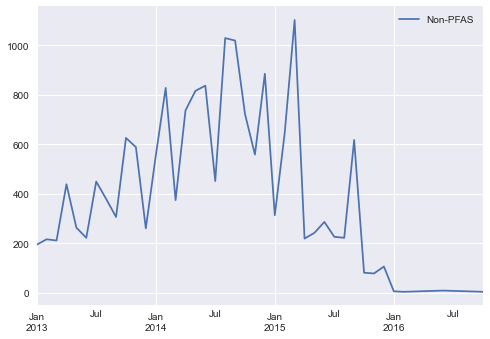

In [77]:
test_year = non_pfas_us.copy()
test_year['CollectionDate'] = pd.to_datetime(test_year['CollectionDate'])
b = test_year.groupby(test_year.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
d = c.notnull().sum()
d.plot(legend = True, label = 'Non-PFAS')

In [78]:
test_year = non_pfas_us.copy()
test_year['CollectionDate'] = pd.to_datetime(test_year['CollectionDate'])
for x in test_year['Contaminant'].unique():
    a = test_year[test_year['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    names = np.append(names, x)
    count_test = count_test.join(d)
count_test = count_test.fillna(0)
count_test 

,PFAS,PFOS,PFHpA,PFHxS,PFOA,PFNA,PFBS,chromium,"1,4-dioxane","1,1-dichloroethane",...,chlorate,cobalt,"1,2,3-trichloropropane",HCFC-22,Halon 1011,"4-androstene-3,17-dione",testosterone,17-beta-estradiol,17-alpha-ethynylestradiol,manganese
2013-01,29,8.0,6.0,5.0,10.0,0.0,0.0,20.0,26.0,4.0,...,28.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,3.0
2013-02,8,2.0,2.0,2.0,2.0,0.0,0.0,19.0,16.0,7.0,...,43.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,1.0,NaN
2013-03,1,0.0,0.0,0.0,1.0,0.0,0.0,13.0,19.0,18.0,...,38.0,1.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-04,15,5.0,3.0,3.0,4.0,0.0,0.0,55.0,35.0,12.0,...,69.0,1.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-05,11,3.0,1.0,1.0,5.0,1.0,0.0,29.0,23.0,4.0,...,51.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-06,10,6.0,1.0,1.0,1.0,1.0,0.0,23.0,16.0,13.0,...,36.0,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-07,51,12.0,8.0,12.0,17.0,1.0,1.0,51.0,42.0,10.0,...,76.0,7.0,3.0,5.0,1.0,1.0,NaN,NaN,NaN,3.0
2013-08,19,5.0,4.0,5.0,4.0,1.0,0.0,47.0,20.0,12.0,...,61.0,3.0,2.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN
2013-09,11,4.0,3.0,1.0,3.0,0.0,0.0,24.0,22.0,14.0,...,56.0,NaN,2.0,3.0,2.0,NaN,1.0,NaN,NaN,NaN
2013-10,25,4.0,8.0,1.0,12.0,0.0,0.0,64.0,43.0,14.0,...,99.0,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


### Linear Regression

I start using linear regression here to test each of the chemicals

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
#strontium
x = count_test.iloc[:, 1].values.reshape(-1, 1)
y = count_test.iloc[:, 7].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.1820827669043491
intercept: [36.27469297]
slope: [[3.2211016]]


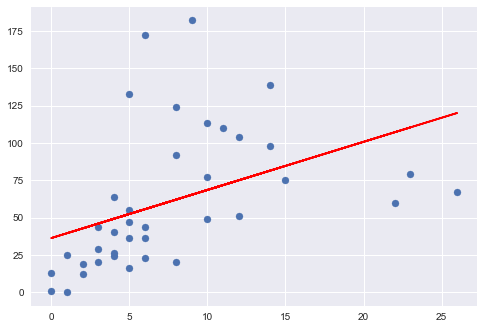

In [82]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [83]:
#chromium
y = count_test.iloc[:, 8].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.433808316770425
intercept: [13.51671009]
slope: [[2.06974321]]


In [ ]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

In [85]:
coef = []
i = 0
for (na, pf) in count_test.iloc[:, :7].iteritems():
    pf = np.array(pf, dtype=int)
    x = pf.reshape(-1, 1)
    coef.append([na])
    for (na2, non) in count_test.iloc[:, 7:].iteritems():
        non = np.array(non, dtype=int)
        y = non.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        r_sq = model.score(x, y)
        coef[i].append(r_sq)
    i += 1
coef

[['PFAS',
  0.1783123248157119,
  0.4300855640551964,
  0.04400827440210486,
  0.23988390419807593,
  0.22537370125689216,
  0.23942160977320137,
  0.29526050309444796,
  0.005277952019502541,
  0.00037939569482214885,
  0.18974230249960988,
  0.2529640848480177,
  0.09167321032366538,
  0.2486960723104037,
  0.04536122867538572,
  0.017183021818316324,
  0.005285221870389378,
  0.0005713170396827172,
  0.020961039209372534,
  0.03177746538546988],
 ['PFOS',
  0.1820827669043491,
  0.433808316770425,
  0.045593421181209126,
  0.2398125214010811,
  0.22789742377025202,
  0.2360906454956302,
  0.28042757101378335,
  0.009895810008848094,
  0.0018118231463817303,
  0.18438245181818547,
  0.27405432813578534,
  0.08029876840255801,
  0.25496798182282976,
  0.04217693031808922,
  0.020810985354320355,
  0.0006988380267130001,
  0.003894627787445981,
  0.02346432774419427,
  0.05934184196906378],
 ['PFHpA',
  0.1276038842633409,
  0.38023475836759013,
  0.038185392685993524,
  0.183952791992

I used r^2 to see if the likelyhood that there was any correlation between each of the chemicals. When looking through it did not look promising. I then however realized that there is a likely reason for this. With how I arranged it by looking as PFAS as a whole, each of the chemicals are being checked with locations that they were never found or detected in the first place. That was skewing and missing up my data. I then seperated them into seperate dataframes and only gathered the locations each individual PFAS chemical was found in.

In [86]:
PFOS = pfas_us[pfas_us['Contaminant'].str.startswith('PFOS')]
PFOS = PFOS.dropna(axis=0)
#non_PFOS_us = non_pfas_us[non_pfas_us['Contaminant'].str.startswith('PFOS') != True]
non_PFOS_us = non_pfas_us[non_pfas_us['PWSName'].isin(PFOS['PWSName'])]

PFHpA = pfas_us[pfas_us['Contaminant'].str.startswith('PFHpA')]
PFHpA = PFHpA.dropna(axis=0)
non_PFHpA_us = non_pfas_us[non_pfas_us['PWSName'].isin(PFHpA['PWSName'])]


PFHxS = pfas_us[pfas_us['Contaminant'].str.startswith('PFHxS')]
PFHxS = PFHxS.dropna(axis=0)
non_PFHxS_us = non_pfas_us[non_pfas_us['PWSName'].isin(PFHxS['PWSName'])]

PFOA = pfas_us[pfas_us['Contaminant'].str.startswith('PFOA')]
PFOA = PFOA.dropna(axis=0)
non_PFOA_us = non_pfas_us[non_pfas_us['PWSName'].isin(PFOA['PWSName'])]

PFNA = pfas_us[pfas_us['Contaminant'].str.startswith('PFNA')]
PFNA = PFNA.dropna(axis=0)
non_PFNA_us = non_pfas_us[non_pfas_us['PWSName'].isin(PFNA['PWSName'])]

PFBS = pfas_us[pfas_us['Contaminant'].str.startswith('PFBS')]
PFBS = PFBS.dropna(axis=0)
non_PFBS_us = non_pfas_us[non_pfas_us['PWSName'].isin(PFBS['PWSName'])]

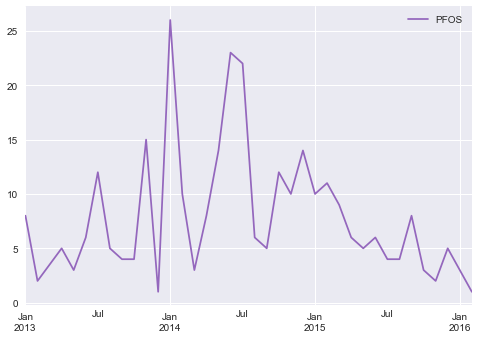

In [87]:
test_PFOS = PFOS.copy()
test_PFOS['CollectionDate'] = pd.to_datetime(test_PFOS['CollectionDate'])
b_p = test_PFOS.groupby(test_PFOS.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()
d_p.plot(legend = True, label = 'PFOS', color = 'tab:purple')

d_p.name = "PFOS"
name_PFOS = np.array(["PFOS"])
count_PFOS = pd.concat([d_p], axis = 1)

<AxesSubplot:>

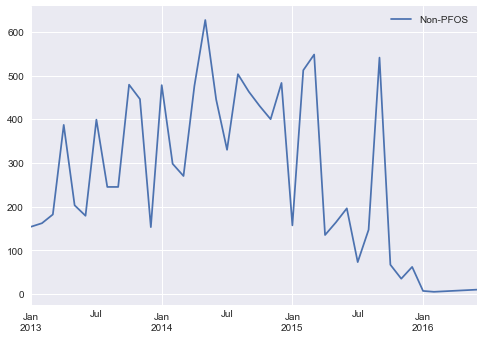

In [88]:
test_non_PFOS = non_PFOS_us.copy()
test_non_PFOS['CollectionDate'] = pd.to_datetime(test_non_PFOS['CollectionDate'])
b = test_non_PFOS.groupby(test_non_PFOS.CollectionDate.dt.to_period("M")).agg('Contaminant')
c = b.apply(pd.DataFrame)
d = c.notnull().sum()
d.plot(legend = True, label = 'Non-PFOS')

In [89]:
test_non_PFOS = non_PFOS_us.copy()
test_non_PFOS['CollectionDate'] = pd.to_datetime(test_non_PFOS['CollectionDate'])
for x in test_non_PFOS['Contaminant'].unique():
    a = test_non_PFOS[test_non_PFOS['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    name_PFOS = np.append(name_PFOS, x)
    count_PFOS = count_PFOS.join(d)
count_PFOS

,PFOS,chromium,"1,4-dioxane","1,1-dichloroethane",strontium,vanadium,chromium-6,molybdenum,chlorate,cobalt,HCFC-22,Halon 1011,chloromethane,"1,2,3-trichloropropane",bromomethane,"4-androstene-3,17-dione",manganese
2013-01,8,17.0,21.0,4.0,27.0,18.0,29,12.0,21.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-02,2,13.0,10.0,6.0,44.0,7.0,34,3.0,39.0,NaN,5.0,NaN,NaN,1.0,NaN,NaN,NaN
2013-04,5,49.0,29.0,12.0,74.0,51.0,74,32.0,61.0,1.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN
2013-05,3,22.0,17.0,3.0,42.0,27.0,32,17.0,39.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-06,6,22.0,13.0,13.0,35.0,25.0,25,16.0,28.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-07,12,46.0,37.0,10.0,77.0,44.0,80,21.0,67.0,7.0,5.0,1.0,NaN,3.0,NaN,1.0,NaN
2013-08,5,29.0,13.0,10.0,60.0,29.0,42,5.0,49.0,NaN,5.0,1.0,NaN,2.0,NaN,NaN,NaN
2013-09,4,19.0,18.0,14.0,61.0,22.0,48,15.0,43.0,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN
2013-10,4,53.0,24.0,11.0,93.0,81.0,86,57.0,71.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2013-11,15,56.0,43.0,13.0,90.0,51.0,78,35.0,71.0,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN


In [90]:
coef = []
i = 0
for (na, pf) in count_PFOS.iloc[:, 0:1].iteritems():
    pf = np.array(pf, dtype=int)
    x = pf.reshape(-1, 1)
    coef.append([na])
    for (na2, non) in count_PFOS.iloc[:, 1:].iteritems():
        non = np.array(non, dtype=int)
        y = non.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        r_sq = model.score(x, y)
        coef[i].append(r_sq)
    i += 1
coef

[['PFOS',
  0.040333830880058374,
  0.06132731315129092,
  0.09138130521970023,
  0.04033383569263471,
  0.04033383203901886,
  0.26477053121531313,
  0.06629800105680916,
  0.040333830585299824,
  0.20760296456954075,
  0.05170246736727646,
  0.1129972798169111,
  0.005324237754913641,
  0.1863863518193568,
  0.0006132730523233931,
  0.009054877571161857,
  0.07858619943724832]]

In [91]:
test_PFHpA = PFHpA.copy()
test_PFHpA['CollectionDate'] = pd.to_datetime(test_PFHpA['CollectionDate'])
b_p = test_PFHpA.groupby(test_PFHpA.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()

d_p.name = "PFHpA"
name_PFHpA = np.array(["PFHpA"])
count_PFHpA = pd.concat([d_p], axis = 1)

test_non_PFHpA = non_PFHpA_us.copy()
test_non_PFHpA['CollectionDate'] = pd.to_datetime(test_non_PFHpA['CollectionDate'])
for x in test_non_PFHpA['Contaminant'].unique():
    a = test_non_PFHpA[test_non_PFHpA['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    name_PFHpA = np.append(name_PFHpA, x)
    count_PFHpA = count_PFHpA.join(d)

In [92]:
coef = []
i = 0
for (na, pf) in count_PFHpA.iloc[:, 0:1].iteritems():
    pf = np.array(pf, dtype=int)
    x = pf.reshape(-1, 1)
    coef.append([na])
    for (na2, non) in count_PFHpA.iloc[:, 1:].iteritems():
        non = np.array(non, dtype=int)
        y = non.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        r_sq = model.score(x, y)
        coef[i].append(r_sq)
    i += 1
coef

[['PFHpA',
  0.008370898021507034,
  0.026017696764985776,
  0.026017702952051303,
  0.0007243377487006208,
  0.3308675375091097,
  0.026017698672077372,
  0.05352210448495143,
  0.058872820675224924,
  0.09340400770419854,
  0.0260176976138472,
  0.2249496117413785,
  0.09426671725180569,
  0.0012971638063263846,
  0.19467502636669431,
  0.00170884578997188,
  0.010265557657941904,
  0.013266523104651595]]

In [93]:
test_PFHxS = PFHxS.copy()
test_PFHxS['CollectionDate'] = pd.to_datetime(test_PFHxS['CollectionDate'])
b_p = test_PFHxS.groupby(test_PFHxS.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()

d_p.name = "PFHxS"
name_PFHxS = np.array(["PFHxS"])
count_PFHxS = pd.concat([d_p], axis = 1)

test_non_PFHxS = non_PFHxS_us.copy()
test_non_PFHxS['CollectionDate'] = pd.to_datetime(test_non_PFHxS['CollectionDate'])
for x in test_non_PFHxS['Contaminant'].unique():
    a = test_non_PFHxS[test_non_PFHxS['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    name_PFHxS = np.append(name_PFHxS, x)
    count_PFHxS = count_PFHxS.join(d)

In [94]:
coef = []
i = 0
for (na, pf) in count_PFHxS.iloc[:, 0:1].iteritems():
    pf = np.array(pf, dtype=int)
    x = pf.reshape(-1, 1)
    coef.append([na])
    for (na2, non) in count_PFHxS.iloc[:, 1:].iteritems():
        non = np.array(non, dtype=int)
        y = non.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        r_sq = model.score(x, y)
        coef[i].append(r_sq)
    i += 1
coef

[['PFHxS',
  0.025723906090659887,
  0.025723910830787955,
  0.025723905506805145,
  0.02572390489824461,
  0.14895499177360227,
  0.04351287088268396,
  0.05405383718068457,
  0.1736463582783203,
  0.060298531764687247,
  0.08769983765400269,
  0.13399673735725925,
  0.10894827746844427,
  0.02572389885807491,
  0.014793754369610834,
  0.009476135347050163,
  6.882137031027913e-05,
  6.882137030994606e-05,
  0.006151206619957272]]

In [95]:
test_PFOA = PFOA.copy()
test_PFOA['CollectionDate'] = pd.to_datetime(test_PFOA['CollectionDate'])
b_p = test_PFOA.groupby(test_PFOA.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()

d_p.name = "PFOA"
name_PFOA = np.array(["PFOA"])
count_PFOA = pd.concat([d_p], axis = 1)

test_non_PFOA = non_PFOA_us.copy()
test_non_PFOA['CollectionDate'] = pd.to_datetime(test_non_PFOA['CollectionDate'])
for x in test_non_PFOA['Contaminant'].unique():
    a = test_non_PFOA[test_non_PFOA['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    name_PFOA = np.append(name_PFOA, x)
    count_PFOA = count_PFOA.join(d)
count_PFOA

,PFOA,chromium-6,strontium,chromium,molybdenum,vanadium,"1,4-dioxane",cobalt,chlorate,"1,1-dichloroethane","1,2,3-trichloropropane",HCFC-22,Halon 1011,chloromethane,bromomethane,"4-androstene-3,17-dione",testosterone,17-alpha-ethynylestradiol,manganese
2013-01,10,15,18,8,12.0,14,14.0,3.0,11,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02,2,17,29,7,2.0,9,3.0,NaN,21,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2013-03,1,10,11,3,6.0,8,NaN,NaN,10,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04,4,22,22,12,20.0,20,7.0,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05,5,13,16,9,3.0,11,6.0,NaN,11,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-06,1,8,10,3,7.0,8,1.0,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07,17,51,53,29,20.0,33,25.0,7.0,43,NaN,NaN,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-08,4,22,40,13,6.0,20,4.0,3.0,20,1.0,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2013-09,3,18,31,7,12.0,14,1.0,NaN,24,NaN,NaN,2.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN
2013-10,12,58,69,29,39.0,51,23.0,3.0,56,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
coef = []
i = 0
for (na, pf) in count_PFOA.iloc[:, 0:1].iteritems():
    pf = np.array(pf, dtype=int)
    x = pf.reshape(-1, 1)
    coef.append([na])
    for (na2, non) in count_PFOA.iloc[:, 1:].iteritems():
        non = np.array(non, dtype=int)
        y = non.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        r_sq = model.score(x, y)
        coef[i].append(r_sq)
    i += 1
coef

[['PFOA',
  0.6364823041823644,
  0.5728306598231729,
  0.5237629225758,
  0.03228859419265906,
  0.6200780825149868,
  0.03918310445063,
  0.1909181903811531,
  0.6094819529341079,
  0.06619243062353763,
  0.28071619250995117,
  0.22944035892476167,
  0.0001007478681616103,
  0.019786030937204768,
  0.0001981652229734454,
  0.014021732348038496,
  0.024459583453370404,
  0.031389704400766494,
  0.01606070835370499]]

The PFOA was the first and possibly only PFAS chemical that I found any hope in. Even if its not a very high coefficant there was a seen correlation between chromium-6, vanadium, and chlorate. Strontium & chromium could be counted too but I wanted to stay above a .6 in this case. To check which numbers went with which chemical, I simply just compared it's spot to the table.

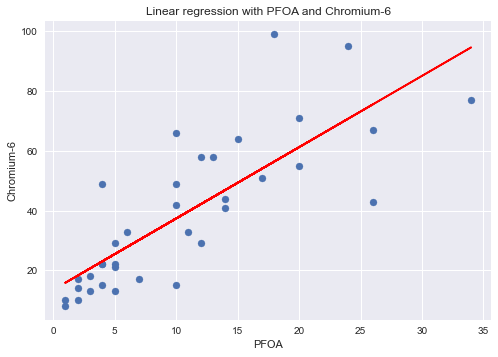

In [97]:
x = count_PFOA.iloc[:, 0].values.reshape(-1, 1)
y = count_PFOA.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_sq = model.score(x, y)
plt.scatter(x, y)
plt.xlabel('PFOA') 
plt.ylabel('Chromium-6')
plt.title('Linear regression with PFOA and Chromium-6')
plt.plot(x, y_pred, color='red')
plt.show()

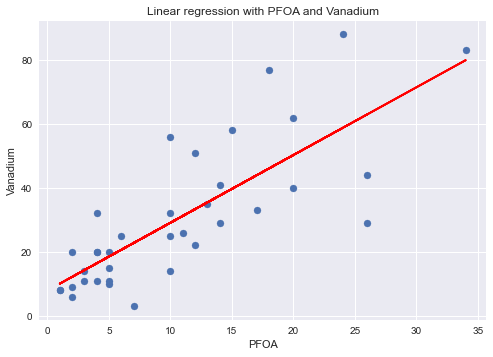

In [98]:
x = count_PFOA.iloc[:, 0].values.reshape(-1, 1)
y = count_PFOA.iloc[:, 5].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_sq = model.score(x, y)
plt.scatter(x, y)
plt.xlabel('PFOA') 
plt.ylabel('Vanadium')
plt.title('Linear regression with PFOA and Vanadium')
plt.plot(x, y_pred, color='red')
plt.plot(x, y_pred, color='red')
plt.show()

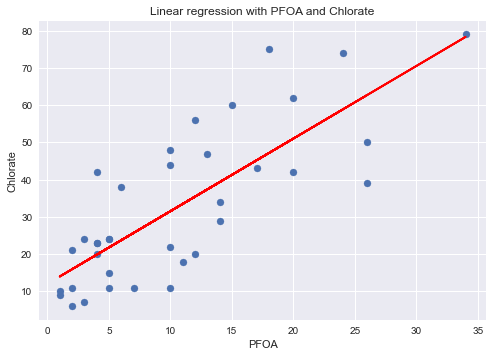

In [99]:
x = count_PFOA.iloc[:, 0].values.reshape(-1, 1)
y = count_PFOA.iloc[:, 8].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict(x)
r_sq = model.score(x, y)
plt.scatter(x, y)
plt.xlabel('PFOA') 
plt.ylabel('Chlorate')
plt.title('Linear regression with PFOA and Chlorate')
plt.plot(x, y_pred, color='red')
plt.plot(x, y_pred, color='red')
plt.show()

In [1]:
pfoa_r = count_PFOA[['PFOA', 'chromium-6' ,'vanadium', 'chlorate']]
corr = pfoa_r.corr(method='spearman')

mask = np.zeros_like(corr, dtype= np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(6, 5))

cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()

NameError: name 'count_PFOA' is not defined

After seeing the models I could see that there they fit quite well with PFOA. I also noticed that they seem to also be somewhat have a connection between the three of them. I decided to make some 3D models to try see how much they correlated.

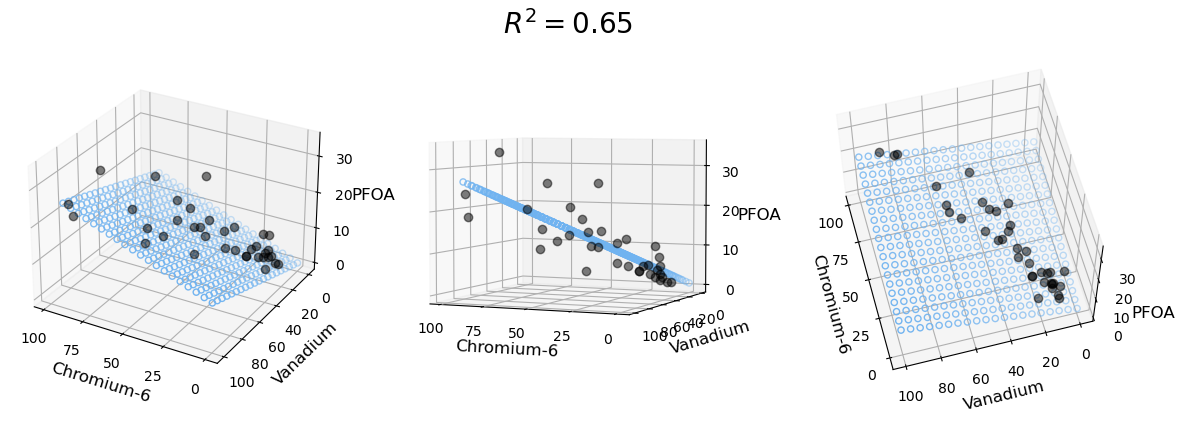

In [101]:
X = count_PFOA[['chromium-6', 'vanadium']].values.reshape(-1, 2)#, 'chlorate']].values.reshape(-1, 3)
Y = count_PFOA['PFOA']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 90, 20)
y_pred = np.linspace(0, 100, 20)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Chromium-6', fontsize=12)
    ax.set_ylabel('Vanadium', fontsize=12)
    ax.set_zlabel('PFOA', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

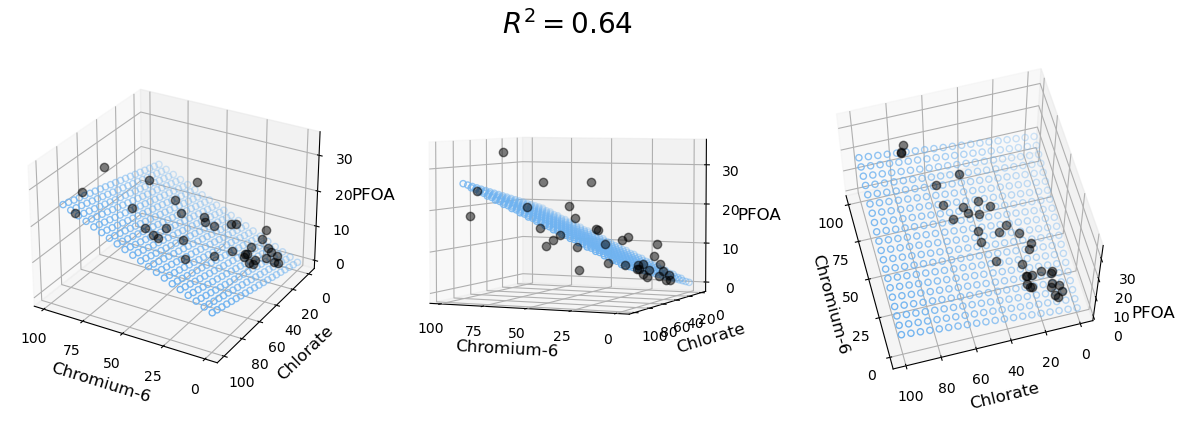

In [105]:
X = count_PFOA[['chromium-6', 'chlorate']].values.reshape(-1, 2)#, 'chlorate']].values.reshape(-1, 3)
Y = count_PFOA['PFOA']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 90, 20)
y_pred = np.linspace(0, 100, 20)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Chromium-6', fontsize=12)
    ax.set_ylabel('Chlorate', fontsize=12)
    ax.set_zlabel('PFOA', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

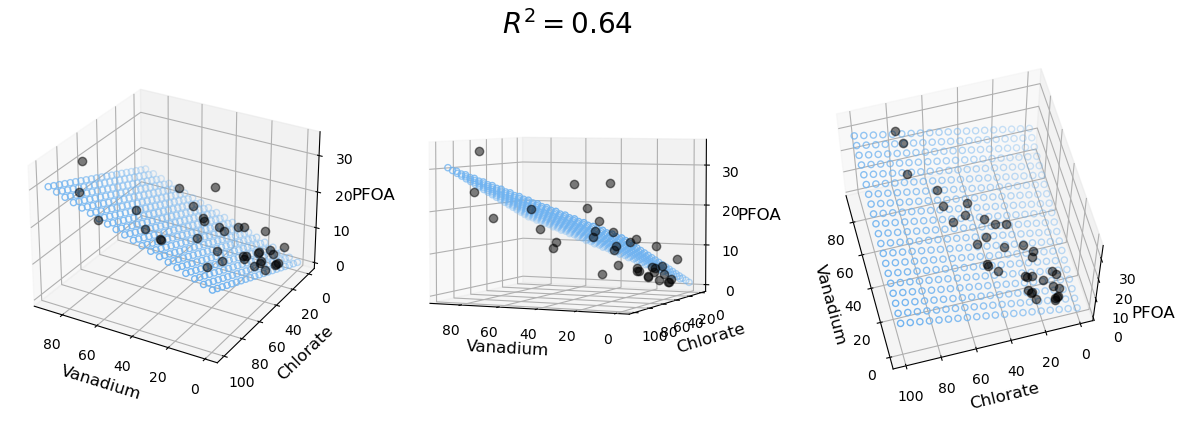

In [106]:
X = count_PFOA[['vanadium', 'chlorate']].values.reshape(-1, 2)#, 'chlorate']].values.reshape(-1, 3)
Y = count_PFOA['PFOA']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(0, 90, 20)
y_pred = np.linspace(0, 100, 20)
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Vanadium', fontsize=12)
    ax.set_ylabel('Chlorate', fontsize=12)
    ax.set_zlabel('PFOA', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

With this model I was able to see and tell that they all very much have a relation between the four of them. This leads me to believe that they all can be used has an indicator.

In [107]:
plt.style.use('seaborn')

In [108]:
test_PFNA = PFNA.copy()
test_PFNA['CollectionDate'] = pd.to_datetime(test_PFNA['CollectionDate'])
b_p = test_PFNA.groupby(test_PFNA.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()

d_p.name = "PFNA"
name_PFNA = np.array(["PFNA"])
count_PFNA = pd.concat([d_p], axis = 1)

test_non_PFNA = non_PFNA_us.copy()
test_non_PFNA['CollectionDate'] = pd.to_datetime(test_non_PFNA['CollectionDate'])
for x in test_non_PFNA['Contaminant'].unique():
    a = test_non_PFNA[test_non_PFNA['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    name_PFNA = np.append(name_PFNA, x)
    count_PFNA = count_PFNA.join(d)
count_PFNA

,PFNA,chromium-6,strontium,chlorate,"1,4-dioxane",vanadium,chromium,"1,1-dichloroethane",cobalt,molybdenum,HCFC-22,manganese
2013-05,1,2,4.0,4.0,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2013-06,1,2,6.0,3.0,1.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN
2013-07,1,2,4.0,4.0,NaN,3.0,3.0,NaN,NaN,1.0,NaN,NaN
2013-08,1,10,11.0,3.0,1.0,8.0,9.0,NaN,NaN,5.0,NaN,NaN
2013-11,1,9,12.0,10.0,8.0,1.0,5.0,NaN,NaN,2.0,NaN,NaN
2014-01,2,6,8.0,3.0,1.0,6.0,3.0,NaN,NaN,2.0,NaN,NaN
2014-02,2,24,29.0,9.0,12.0,18.0,11.0,NaN,NaN,14.0,2.0,11.0
2014-03,1,2,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
2014-05,1,9,12.0,10.0,4.0,2.0,5.0,1.0,NaN,1.0,NaN,1.0
2014-06,1,4,9.0,9.0,2.0,3.0,3.0,NaN,NaN,8.0,NaN,NaN


In [109]:
coef = []
i = 0
for (na, pf) in count_PFNA.iloc[:, 0:1].iteritems():
    pf = np.array(pf, dtype=int)
    x = pf.reshape(-1, 1)
    coef.append([na])
    for (na2, non) in count_PFNA.iloc[:, 1:].iteritems():
        non = np.array(non, dtype=int)
        y = non.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        r_sq = model.score(x, y)
        coef[i].append(r_sq)
    i += 1
coef

[['PFNA',
  0.3273303705580364,
  0.015384617279737611,
  0.01538461562914717,
  0.05325443837172772,
  0.07692307840364077,
  0.015384616225193715,
  0.03296703296703296,
  0.01538461538461533,
  0.032967034054794175,
  0.28888888888888886,
  0.03221564805745403]]

In [110]:
test_PFBS = PFBS.copy()
test_PFBS['CollectionDate'] = pd.to_datetime(test_PFBS['CollectionDate'])
b_p = test_PFBS.groupby(test_PFBS.CollectionDate.dt.to_period("M")).agg('Contaminant')
c_p = b_p.apply(pd.DataFrame)
d_p = c_p.notnull().sum()

d_p.name = "PFBS"
name_PFBS = np.array(["PFBS"])
count_PFBS = pd.concat([d_p], axis = 1)

test_non_PFBS = non_PFBS_us.copy()
test_non_PFBS['CollectionDate'] = pd.to_datetime(test_non_PFBS['CollectionDate'])
for x in test_non_PFBS['Contaminant'].unique():
    a = test_non_PFBS[test_non_PFBS['Contaminant'] == x].copy()
    b = a.groupby(a.CollectionDate.dt.to_period("M")).agg('Contaminant')
    c = b.apply(pd.DataFrame)
    d = c.notnull().sum()
    d.name = x
    name_PFBS = np.append(name_PFBS, x)
    count_PFBS = count_PFBS.join(d)

In [111]:
coef = []
i = 0
for (na, pf) in count_PFBS.iloc[:, 0:1].iteritems():
    pf = np.array(pf, dtype=int)
    x = pf.reshape(-1, 1)
    coef.append([na])
    for (na2, non) in count_PFBS.iloc[:, 1:].iteritems():
        non = np.array(non, dtype=int)
        y = non.reshape(-1, 1)
        model = LinearRegression().fit(x, y)
        y_pred = model.predict(x)
        r_sq = model.score(x, y)
        coef[i].append(r_sq)
    i += 1
coef

[['PFBS',
  0.4449074059738821,
  0.16581708037825071,
  0.039682539377642434,
  0.15802469476444236,
  0.28697322623828636,
  0.07111111091077327,
  0.16088265333548335,
  0.015432098765432056,
  0.07111111111111135,
  0.05714285709407374,
  0.0711111111111109]]

After all of that, PFOA turned out to be the only PFAS chemical I could find that had somewhat of a correlation with any chemical. I still believe though that the three chemicals found to correlate can be used as an indicator for PFOA.

## If there is a rise of people exposed to PFAS across the US

This data gives the results from the blood of different subjects with the amount of chemicals found in their blood. There were many different types of PFAS given but to stay in line with the same chemicals I had, I only checked for the same PFAS chemicals which in this case was only PFNA and PFBS.

In [112]:
blood13_14 = pd.read_csv("C:\\Users\\cabon\\OneDrive\\Documents\\Capstone\\PFAS_2013-2014.csv")
blood15_16 = pd.read_csv("C:\\Users\\cabon\\OneDrive\\Documents\\Capstone\\PFAS_2015-2016.csv")
blood13_14

,SEQN,WTSB2YR,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFBS,LBDPFBSL,LBXPFHP,LBDPFHPL,LBXPFNA,LBDPFNAL,LBXPFUA,LBDPFUAL,LBXPFDO,LBDPFDOL
0,73568,270133.488619,0.2,0,3,0,0.2,0,0.07,1,0.07,1,0.5,0,0.1,0,0.07,1
1,73571,138554.659645,0.3,0,2,0,0.2,0,0.07,1,0.07,1,1.3,0,0.07,1,0.07,1
2,73574,46186.186645,0.1,0,0.2,0,0.07,1,0.07,1,0.07,1,0.7,0,0.07,1,0.07,1
3,73576,37460.999852,0.2,0,7.6,0,0.07,1,0.07,1,0.2,0,0.6,0,0.07,1,0.1,0
4,73577,128174.418941,0.1,0,1.2,0,0.07,1,0.07,1,0.07,1,0.4,0,0.07,1,0.07,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,83711,82946.684281,0.07,1,0.6,0,0.2,0,0.07,1,0.07,1,0.3,0,0.07,1,0.07,1
2189,83713,49551.258249,0.9,0,1.1,0,0.07,1,0.07,1,0.07,1,1.5,0,0.5,0,0.3,0
2190,83717,29856.202622,0.2,0,1.4,0,0.07,1,0.07,1,0.07,1,0.8,0,0.07,1,0.07,1
2191,83723,35010.256954,0.07,1,1.7,0,0.07,1,0.07,1,0.07,1,0.3,0,0.07,1,0.07,1


In [113]:
tp_of_pfas = pfas_us['Contaminant'].unique()
tp_of_pfas = tp_of_pfas.astype('str')
tp_of_pfas

array(['PFOS', 'PFHpA', 'PFHxS', 'PFOA', 'PFNA', 'PFBS'], dtype='<U5')

In [114]:
f = pd.DataFrame()
for x in tp_of_pfas:
    for col in blood13_14.columns:
        if x in col:
            print(col)
            f.append(blood13_14[col])           
f

LBXPFNA
LBDPFNAL
LBXPFBS


C:\Users\cabon\AppData\Local\Temp/ipykernel_6908/1486602100.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\cabon\AppData\Local\Temp/ipykernel_6908/1486602100.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\cabon\AppData\Local\Temp/ipykernel_6908/1486602100.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



LBDPFBSL


C:\Users\cabon\AppData\Local\Temp/ipykernel_6908/1486602100.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



""


2193

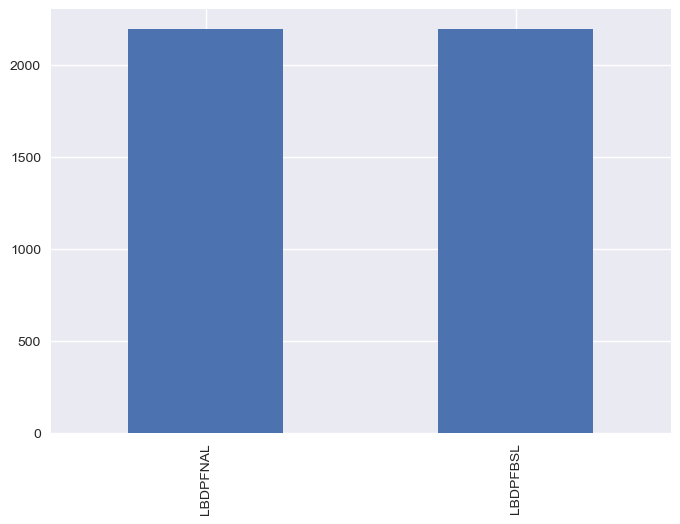

In [115]:
b13_14 = blood13_14[['LBDPFNAL', 'LBDPFBSL']]
b13 = b13_14[b13_14['LBDPFNAL'] != 1]
b13.count().plot(kind = 'bar')
b13['LBDPFNAL'].count()

In [116]:
blood15_16

,SEQN,WTSB2YR,LBXPFDE,LBDPFDEL,LBXPFHS,LBDPFHSL,LBXMPAH,LBDMPAHL,LBXPFNA,LBDPFNAL,...,LBXPFDO,LBDPFDOL,LBXNFOA,LBDNFOAL,LBXBFOA,LBDBFOAL,LBXNFOS,LBDNFOSL,LBXMFOS,LBDMFOSL
0,83736,44132.048218,0.1,0,0.6,0,0.07,1,0.5,0,...,0.07,1,0.9,0,0.07,1,3.8,0,0.6,0
1,83745,83710.974098,0.07,1,1.4,0,0.07,1,1.4,0,...,0.07,1,1.4,0,0.07,1,1.6,0,0.8,0
2,83750,272187.569725,0.07,1,4.9,0,0.1,0,0.8,0,...,0.07,1,1.2,0,0.07,1,4.1,0,1.9,0
3,83754,30604.070294,0.1,0,1.2,0,0.1,0,1,0,...,0.07,1,2.8,0,0.07,1,6.1,0,5.4,0
4,83762,123719.017406,0.07,1,0.2,0,0.2,0,0.4,0,...,0.07,1,0.5,0,0.07,1,0.9,0,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,93664,81863.336021,0.07,1,1.4,0,0.07,1,0.3,0,...,0.07,1,0.6,0,0.07,1,2.4,0,1.6,0
2031,93671,60674.477558,0.4,0,6.2,0,0.07,1,0.9,0,...,0.07,1,1.9,0,0.07,1,15.6,0,3.4,0
2032,93675,95891.869718,0.1,0,1.5,0,0.07,1,0.3,0,...,0.07,1,1.7,0,0.07,1,1,0,0.8,0
2033,93685,67721.994612,0.07,1,1.7,0,0.07,1,0.4,0,...,0.07,1,0.4,0,0.07,1,3.7,0,2.3,0


In [117]:
for x in tp_of_pfas:
    for col in blood15_16.columns:
        if x in col:
            print(col)

LBXPFNA
LBDPFNAL


In [118]:
b15_16 = blood15_16[blood15_16['LBDPFNAL'] != 1]
b15_16['LBDPFNAL'].count()

2035

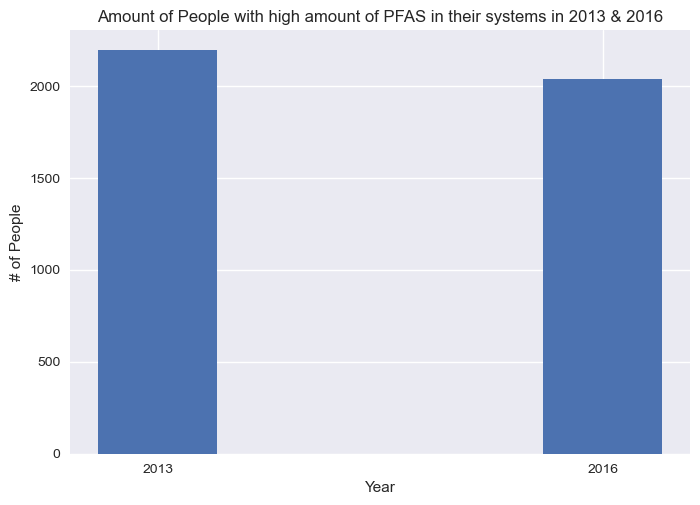

In [193]:
fig, ax = plt.subplots()
tt = pd.DataFrame({'Contaminated People' : [b13.shape[0], b15_16.shape[0]], 'Year' :[2013, 2016]}, index = [2013, 2016]) 
plt.bar(tt['Year'], tt['Contaminated People'])
ax.set_xticks([2013, 2016])
ax.set_xlabel('Year')
ax.set_ylabel('# of People')
ax.set_title('Amount of People with high amount of PFAS in their systems in 2013 & 2016')
plt.show()

In the end the only PFAS chemical I could find that was critical was PFNA. However  was unable to really tell if there was a change over two years for people with PFAS. I was recommend for this one to use a bar graph which I have not yet. Regardless the change from 2013 to 2016 is very small as it only goes to 2200 people to 2030 people above the standard amount. So for my hypothesis 5 it sadly ends there.